### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor



### Importing dataset

In [2]:
df = pd.read_csv("Dataset/cleaned_dataset.csv")

In [3]:
df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [3]:
#removing some categorical variables which cannot be encoded and included in the model
df.drop(['Unnamed: 0','FlightNum', 'Cancelled', 'Diverted','UniqueCarrier','TailNum', 'Origin', 'Dest'], 
        inplace = True, axis = 1)

### Preprocessing and Visualizations

In [5]:
my_cmap = sns.color_palette("YlGnBu")

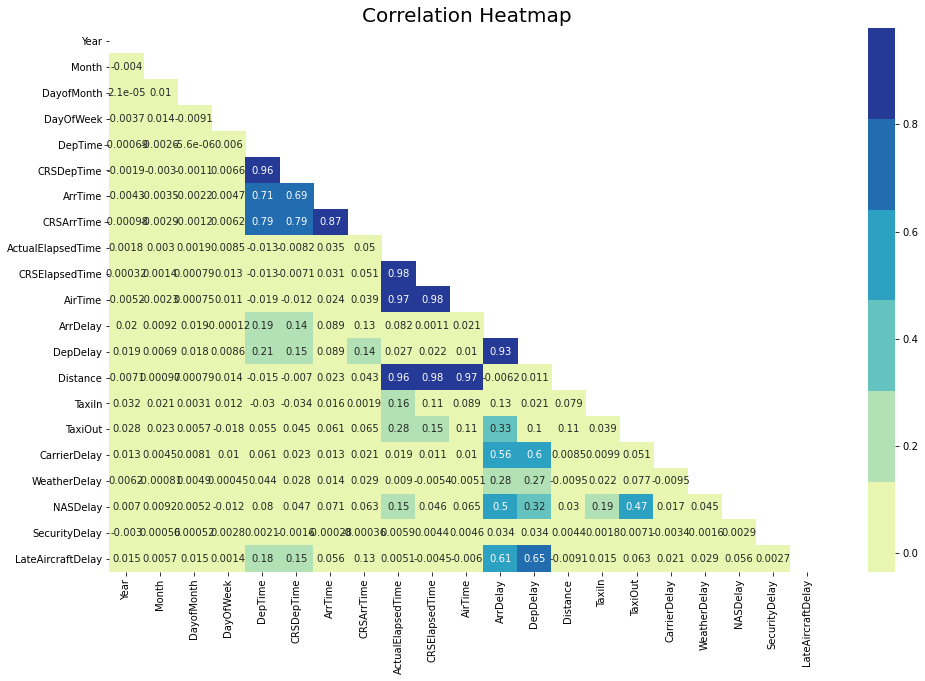

In [43]:
#correlation heatmap

plt.figure(figsize = (16,10))

mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = my_cmap,
           mask = mask)
plt.title('Correlation Heatmap', fontsize = 20)

#plt.savefig("Figures/Correlation heatmap.png")
plt.show()

### Building the model

In [4]:
#dividing the data into the regressors and target
x = df.loc[:,["Month", "DayOfWeek", "CRSDepTime", "CRSArrTime","DepDelay", "CRSElapsedTime"]]

y = df["ArrDelay"]

In [5]:
#spliting data to train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11415142, 6)
(11415142,)
(2853786, 6)
(2853786,)


In [6]:
#scaling the data - StandardScaler
scaler = StandardScaler()
data_train = scaler.fit_transform(x_train)
data_test = scaler.transform(x_test)


In [43]:
#scaled training data
x_train.head()

,Month,DayOfWeek,CRSDepTime,CRSArrTime,LateAircraftDelay,DepDelay,CRSElapsedTime
5237068,9,6,1340,1643,0,-3.0,123.0
9940998,5,4,1038,1150,0,10.0,72.0
11220582,7,5,915,1645,0,-3.0,270.0
10493308,6,5,1420,1535,0,59.0,75.0
4106175,8,2,730,850,0,-5.0,140.0


In [7]:
#casting the scaled data to a dataframe
x_train = pd.DataFrame(data=data_train,columns=x.columns)
x_test = pd.DataFrame(data=data_test,columns=x.columns)

### Multiple Linear Regression

In [45]:
#initialize model
lm = linear_model.LinearRegression()

#fit the model
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
#checking the coefficients
coef = lm.coef_
coef

array([ 0.11035141, -0.29685897, -0.36683058,  0.23609348,  0.73655339,
       34.66651776, -0.71382894])

In [48]:
#predict the y_test values based on the x_test variables 
predict = lm.predict(x_test)

In [49]:
#checking the accuracy of the model

r2 = metrics.r2_score(y_test, predict)
mse = metrics.mean_squared_error(y_test, predict)

print("R squared: ", round(r2,3))
print("Mean Squared Error: ", round(mse,3))

R squared:  0.858
Mean Squared Error:  203.645


<Figure size 720x720 with 0 Axes>

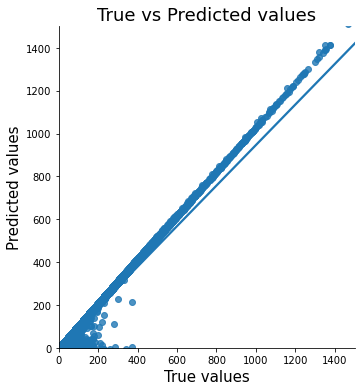

In [47]:
#actual vs fitted plot
plt.figure(figsize=(10,10))

sns.lmplot(data = actual_predicted, x = "Actual", y = "Predicted", 
          palette = "BuGn")


plt.title("True vs Predicted values", fontsize = 18)
plt.xlabel("True values", fontsize = 15)
plt.ylabel("Predicted values", fontsize = 15)

plt.xlim([0,1500])
plt.ylim([0,1500])

plt.savefig("Figures/Actual_predicted.png")
plt.show()

### Random Forest Regression

In [ ]:
#using the same training and testing sets (after scaling)

In [8]:
#instantiating the random forest regressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)

#fit the training data (took around 30 mins to run)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
coef_rf = rf.coef_
coef_rf

In [8]:
#accuracy
accuracy_rf = rf.score(x_test, y_test)
accuracy_rf

0.8409569080916999

In [9]:
#predict the y_test values based on the x_test variables 
predict_rf = rf.predict(x_test)

In [14]:
r2 = metrics.r2_score(y_test, predict_rf)
mse = metrics.mean_squared_error(y_test, predict_rf)

print("R squared: ", round(r2,3))
print("Mean Squared Error: ", round(mse,3))

R squared:  0.841
Mean Squared Error:  228.324


In [15]:
#actual vs fitted plot
plt.figure(figsize=(10,10))

sns.lmplot(data = actual_predicted, x = "Actual", y = "Predicted", 
          color = "Green")


plt.title("True vs Predicted values", fontsize = 18)
plt.xlabel("True values", fontsize = 15)
plt.ylabel("Predicted values", fontsize = 15)

plt.xlim([0,1500])
plt.ylim([0,1500])

plt.savefig("Figures/Actual_predicted - Random Forest.png")
plt.show()

NameError: name 'actual_predicted' is not defined

<Figure size 720x720 with 0 Axes>

In [20]:
actual_predicted = pd.DataFrame({"Actual": })

In [19]:
type(predict_rf)

numpy.ndarray